# Best Models for Heart Stroke Prediction

Tyson Ditner | 230147201 | ditner@unbc.ca

Noah Stobbe | 230140171 | stobbe@unbc.ca

CPSC499 - Applied Machine Learning

## References

1. Aurélien Géron, "Hands-On Machine Learning with Scikit-Learn & TensorFlow".

2. https://www.kaggle.com/datasets/mirzahasnine/heart-disease-dataset

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
#from google.colab import files, drive
#import gdown

# Upload a kaggle.json
#files.upload()

from warnings import catch_warnings
file_id = '1DrXop-XopWp_7HxfSDa-lV19iBVBsVVc' # '1CemmlVVZkHVf3Gufln6dFCWeoZ6ZDr0i'

# URL for downloading the file from Google Drive
url = f'https://drive.google.com/file/d/{file_id}' # f'https://drive.google.com/uc?id={file_id}'

# Path to save the downloaded file
file_path = '/content/drive/MyDrive/heart-disease-dataset.zip'
folder_path = '/content/drive'

# Create the path
try:
    os.mkdir(folder_path)
    os.mkdir(folder_path + '/MyDrive')
except OSError as error:
    print(error)

# Download the file
gdown.download(url, file_path, quiet=False)
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/heart-disease-dataset.zip', 'r')
zip_ref.extractall('/content/drive/MyDrive')
zip_ref.close()

raw_data = pd.read_csv(file_path)

"""
dataset = 'heart-disease-dataset'
!rm -r $dataset

!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
"""

"""
!kaggle datasets download -d mirzahasnine/heart-disease-dataset
"""

"""
import zipfile
zip_ref = zipfile.ZipFile('/content/heart-disease-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()
"""

In [25]:
raw_data = pd.read_csv("data/heart_disease.csv", sep=',')

In [26]:
raw_data.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


'education' does not seem like a relevant heart disease predictor. We will drop this column.

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='cigsPerDay', ylabel='age'>,
        <Axes: xlabel='totChol', ylabel='age'>,
        <Axes: xlabel='heartRate', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='cigsPerDay'>,
        <Axes: xlabel='cigsPerDay', ylabel='cigsPerDay'>,
        <Axes: xlabel='totChol', ylabel='cigsPerDay'>,
        <Axes: xlabel='heartRate', ylabel='cigsPerDay'>],
       [<Axes: xlabel='age', ylabel='totChol'>,
        <Axes: xlabel='cigsPerDay', ylabel='totChol'>,
        <Axes: xlabel='totChol', ylabel='totChol'>,
        <Axes: xlabel='heartRate', ylabel='totChol'>],
       [<Axes: xlabel='age', ylabel='heartRate'>,
        <Axes: xlabel='cigsPerDay', ylabel='heartRate'>,
        <Axes: xlabel='totChol', ylabel='heartRate'>,
        <Axes: xlabel='heartRate', ylabel='heartRate'>]], dtype=object)

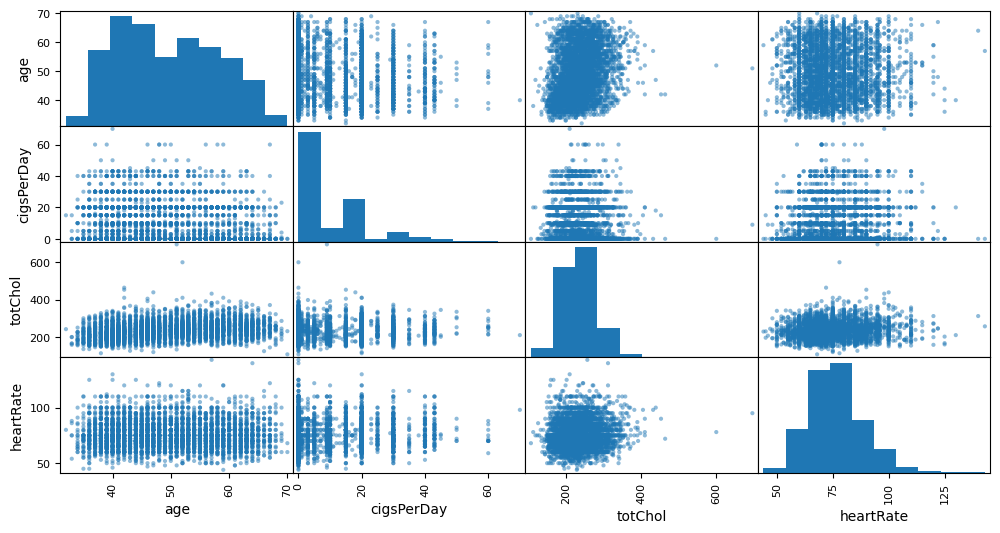

In [27]:
from pandas.plotting import scatter_matrix
attributes_scatter = ["age", "cigsPerDay", "totChol", "heartRate"]
scatter_matrix(raw_data[attributes_scatter], figsize=(12, 6))

Check for null values

In [28]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', and 'glucose' contain null values

In [29]:
raw_data.describe()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000
mean,49.584946,0.494101,9.003089,0.029630,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753
std,8.572160,0.500024,11.920094,0.169584,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,1.000000,20.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000
max,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


## Preprocessing

In [30]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Encode non-numerical features numerically

class TransformEncoder(BaseEstimator, TransformerMixin):
    
    def __init___():
        return
    
    def fit(self, X, y=None):
        # Do nothing
        return self
    
    # Encode Gender and Geography as matrices with a single 1 per row
    def transform(self, X, y=None):

        one_hot_encoder = OneHotEncoder()

        # Encode "Gender"
        column_names = ["Female", "Male"]
        one_hot_matrix = one_hot_encoder.fit_transform(X[['Gender']]).toarray()
        for i in range(len(one_hot_matrix.T)):
            X[column_names[i]] = one_hot_matrix.T[i]

        X['Female'] = X['Female'].astype('int64')
        X['Male'] = X['Male'].astype('int64')

        # Encode "prevalentStroke"
        column_names = ["prevalentStroke", "!prevalentStroke"]
        one_hot_matrix = one_hot_encoder.fit_transform(X[['prevalentStroke']]).toarray()
        for i in range(len(one_hot_matrix.T)):
            X[column_names[i]] = one_hot_matrix.T[i]

        X['prevalentStroke'] = X['prevalentStroke'].astype('int64')
        X['!prevalentStroke'] = X['!prevalentStroke'].astype('int64')

        return X

In [31]:
class TransformImputer(BaseEstimator, TransformerMixin):
    
    def __init___():
        return
    
    def fit(self, X, y=None):
        # Do nothing
        return self
    
    def transform(self, X, y=None):
        simpleImputer1 = SimpleImputer(strategy="mean") # Strategy: fill null values in with mean values
        simpleImputer2 = SimpleImputer(strategy="most_frequent") # Strategy: majority vote
        X["cigsPerDay"] = simpleImputer1.fit_transform(X[["cigsPerDay"]]) # Fill null 'cigsPerDay' values with mean
        X["BPMeds"] = simpleImputer1.fit_transform(X[["BPMeds"]]) # Fill null 'BPMeds' values with mean
        X["totChol"] = simpleImputer1.fit_transform(X[["totChol"]]) # Fill null 'totChol' values with mean
        X["BMI"] = simpleImputer1.fit_transform(X[["BMI"]]) # Fill null 'BMI' values with mean
        X["heartRate"] = simpleImputer1.fit_transform(X[["heartRate"]]) # Fill null 'heartRate' values with mean
        X["glucose"] = simpleImputer1.fit_transform(X[["glucose"]]) # Fill null 'glucose' values with mean
        return X

In [32]:
class TransformDropper(BaseEstimator, TransformerMixin):
    
    def __init___():
        return
    
    def fit(self, X, y=None):
        return self
    
    # Drop the specified columns (not rows, hence axis=1):
    def transform(self, X, y=None):
        return X.drop(["education", "Gender"], axis=1, errors="ignore")

In [33]:
from sklearn.pipeline import Pipeline

# Enable cleaning data to be accomplished with 1 command
clean_data = Pipeline([("transform_encoder", TransformEncoder()),
                       ("transform_imputer", TransformImputer()),
                       ("transform_dropper", TransformDropper())])
cleaned_data = clean_data.fit_transform(raw_data)
cleaned_data.head()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke,Female,Male,!prevalentStroke
0,39,0,0.0,0.0,1,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No,0,1,0
1,46,0,0.0,0.0,1,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No,1,0,0
2,48,1,20.0,0.0,1,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No,0,1,0
3,61,1,30.0,0.0,1,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes,1,0,0
4,46,1,23.0,0.0,1,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No,1,0,0


In [34]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               4238 non-null   int64  
 1   currentSmoker     4238 non-null   int64  
 2   cigsPerDay        4238 non-null   float64
 3   BPMeds            4238 non-null   float64
 4   prevalentStroke   4238 non-null   int64  
 5   prevalentHyp      4238 non-null   int64  
 6   diabetes          4238 non-null   int64  
 7   totChol           4238 non-null   float64
 8   sysBP             4238 non-null   float64
 9   diaBP             4238 non-null   float64
 10  BMI               4238 non-null   float64
 11  heartRate         4238 non-null   float64
 12  glucose           4238 non-null   float64
 13  Heart_ stroke     4238 non-null   object 
 14  Female            4238 non-null   int64  
 15  Male              4238 non-null   int64  
 16  !prevalentStroke  4238 non-null   int64  


<Axes: >

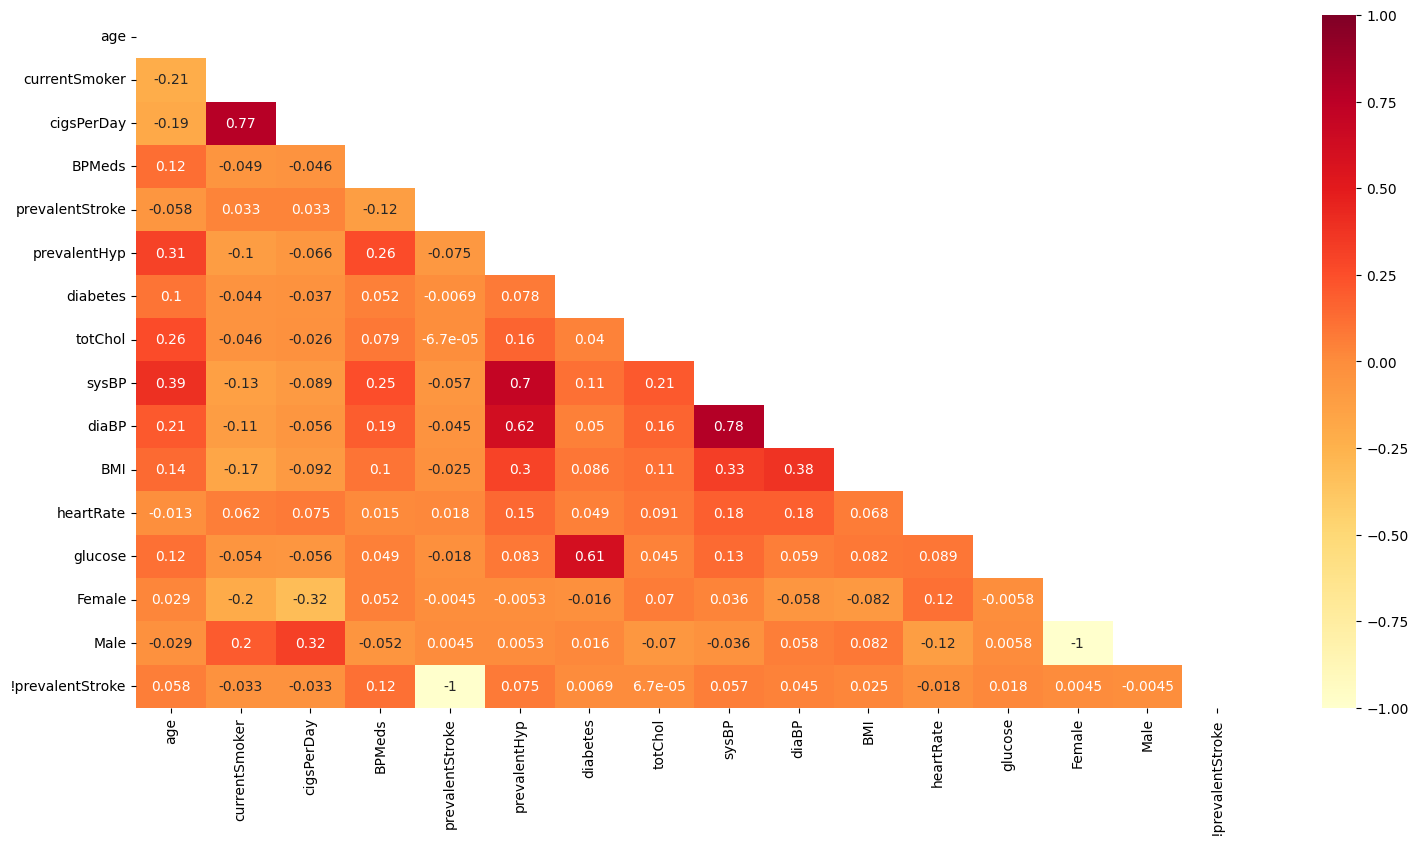

In [35]:
mask = np.triu(np.ones_like(cleaned_data.corr(numeric_only=True)))
plt.figure(figsize=(18,9))
sns.heatmap(cleaned_data.corr(numeric_only=True), cmap="YlOrRd", annot=True, mask=mask, vmin=-1, vmax=1)

## Model Building
### Split dataset

In [36]:
def get_X_y(data):

    X = data.drop(["Heart_ stroke"], axis=1)
    y = data["Heart_ stroke"]

    return X, y

In [37]:
# Shuffle the data before splitting to reduce chance of abnormal distribution
cleaned_data = cleaned_data.sample(frac=1, random_state=0)

X, y = get_X_y(cleaned_data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1)

In [38]:
train_stats = X_train.describe() # Get the mean of training data
train_stats = train_stats.transpose()

#### Normalization

In [39]:
def scale_X_y(X, y):
    X_data = (X - train_stats['mean']) / train_stats['std']
    y_data = y

    return X_data, y_data

In [40]:
X_train, y_train = scale_X_y(X_train, y_train)
X_test, y_test = scale_X_y(X_test, y_test)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3390 entries, 1690 to 2953
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               3390 non-null   float64
 1   currentSmoker     3390 non-null   float64
 2   cigsPerDay        3390 non-null   float64
 3   BPMeds            3390 non-null   float64
 4   prevalentStroke   3390 non-null   float64
 5   prevalentHyp      3390 non-null   float64
 6   diabetes          3390 non-null   float64
 7   totChol           3390 non-null   float64
 8   sysBP             3390 non-null   float64
 9   diaBP             3390 non-null   float64
 10  BMI               3390 non-null   float64
 11  heartRate         3390 non-null   float64
 12  glucose           3390 non-null   float64
 13  Female            3390 non-null   float64
 14  Male              3390 non-null   float64
 15  !prevalentStroke  3390 non-null   float64
dtypes: float64(16)
memory usage: 450.2 KB


### Model Implementation

## KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier

param_distribution_knn = [
    {'p': [0.5, 1.0, 1.5, 2.0], 'leaf_size': [20,30,40]}
]

knn = KNeighborsClassifier()
grid_search_knn = RandomizedSearchCV(knn, param_distribution_knn, n_iter=10, cv=5, scoring='f1', random_state=0)
bag_knn = BaggingClassifier(estimator=grid_search_knn)

bag_knn.fit(X_train, y_train)
y_train_pred_knn = bag_knn.predict(X_train)
y_test_pred_knn = bag_knn.predict(X_test)
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_pred_knn))
print("Test Accuracy:", metrics.accuracy_score(y_test, y_test_pred_knn))

c:\Users\oah1s\anaconda3\envs\UNBCstobbe_Assign1\Lib\site-packages\sklearn\neighbors\_base.py:654: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
c:\Users\oah1s\anaconda3\envs\UNBCstobbe_Assign1\Lib\site-packages\sklearn\neighbors\_base.py:654: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
c:\Users\oah1s\anaconda3\envs\UNBCstobbe_Assign1\Lib\site-packages\sklearn\neighbors\_base.py:654: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
c:\Users\oah1s\anaconda3\envs\UNBCstobbe_Assign1\Lib\site-packages\sklearn\neighbors\_base.py:654: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
c:\U

Train Accuracy: 0.8758112094395281
Test Accuracy: 0.8372641509433962
